# Linear Regression

### Intro

This notebook contains a quick walkthrough on how to implement and plot a linear regression model using statsmodels and Matplot libraries.

The notebook is divided into two parts: one to implement a **simple linear regression** model, and one for a **multiple linear regression** model with two predictors. In both cases, the same dataset is used and we implement the regression using the OLS function from [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html), which fits a linear model using the _least squares approach_ (also called _Ordinary Least Squares_ ): this estimates the regression coefficients by  minimising the residual sum of squares (RSS).

Throughtout the notebook we will use the _advertsing_ dataset from "An Introduction To Statistical Learning" by James et al, which consist of the advertising budgets (in thousands of US dollars) for three media (TV, radio and newspapers) of a fictional company and sales data for that company. The idea is to implement a linear regression model to predict sales data, first by using one predictor (TV - simple linear regression), and then by using two predictors (TV and newspapers - multiple linear regression).

A .csv file of the dataset can be downloaded by clicking [here]( 
https://www.statlearning.com/s/Advertising.csv).

### Libraries

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

### Data

In [2]:
# Let's download and look at the data

advertising = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', usecols=[1,2,3,4])

print("Dataset Summary:")
print(advertising.info())

print("\n")

print("Dataset stats:")
print(advertising.describe())

print("\n")

print("Dataset preview:")
print(advertising.head())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Dataset stats:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


Dataset preview:
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180

In what follows our task is going to predict **sales**:

In [3]:
# Set the target Y

Y = advertising['sales']

### Simple Linear Regression

In this part of the notebook we try to predict **sales** using **TV** budget as our predictor variable.

In [4]:
# Set our predictor variable X
# and add a constant term so the model can fit an intercept

X = advertising['TV']
X_slr = sm.add_constant(X)

In [5]:
# Fit a SLR to our X and Y

slr = sm.OLS(Y, X_slr).fit()

Let's summarise our regression fit:

In [6]:
slr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: sales            AIC:                1042.0913
Date:               2022-07-21 17:58 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     7.0326      0.4578    15.3603    0.0000    6.1297    7.9355
TV        0.0475      0.0027    17.6676    0.0000    0.0422    0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

From the tables above we can deduce the following important points:

* Using the equation $Y = \beta_0 +\beta_1X $, with X = TV, we have $\beta_0 = 7.0326$ and $\beta_1 = 0.0475$
* An increment of 1,000 dollars in the TV budget corresponds to an increment of roughly 50 units in sales
* The low p-values suggest that we can reject the null-hypothesis $H_0$
* $R^2 = 0.612$ implies that more than half of the variability on Y (sales) can be explained by a linear regression on X (TV) 

Using the regression coefficients computed, we can plot our data points, the regression line, and the corresponding residuals.

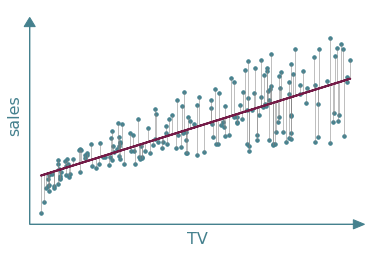

In [7]:
# SLR plot

beta0 = slr.params[0]
beta1 = slr.params[1]

rline = [beta1 * x + beta0 for x in X] # regression line

# axis arrow param
hw = 1./30.* 40 
hl = 1./30.* 320
lw = 1. # axis line width

# start the plot
fig = plt.figure()
ax = fig.add_subplot(111)

# remove axis spine
ax.spines['left'].set_color('none') 
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


# add axis arrows
ax.arrow(-10, 0, 320, 0.,  fc='#45818e', ec='#45818e', lw = lw, 
         head_width=hw, head_length=hl, overhang = 0, 
         length_includes_head= True, clip_on = False) 
ax.arrow(-10, 0, 0, 30,  fc='#45818e', ec='#45818e', lw = lw, 
         head_width=hl, head_length=hw, overhang = 0, 
         length_includes_head= True, clip_on = False) 

# add axis label
ax.axes.set_xlabel('TV', fontsize=16, c='#45818e')
# ax.xaxis.set_label_coords(0.92, -0.025)
ax.axes.set_ylabel('sales', fontsize=16, c='#45818e')
# ax.yaxis.set_label_coords(-0.025, 0.80)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# plot points
plt.scatter(X, Y, c=['#45818e'], s=12)

# plot residual
for i in range(len(X)):
        lineXdata = (X[i], X[i]) # same X
        lineYdata = (Y[i], rline[i]) # different Y
        plt.plot(lineXdata, lineYdata, c='grey', lw=0.5)
        
# plot regression line
plt.plot(X, rline, c='#741b47', lw=2)
        
# show plot        
plt.xlim(-10,310)
plt.ylim(ymin=0)

plt.show()

# save plot
#plt.savefig('SLR.png', dpi=300)

### Multiple Linear Regression

In this part of the notebook we try to predict **sales** using **TV** and **newspapers** budget as our predictor variables.

In [8]:
# Set our predictor variables X1, X2
# and add a constant term so the model can fit an intercept

X1 = advertising['TV']
X2 = advertising['newspaper']

X = advertising[['TV', 'newspaper']]
X_mlr = sm.add_constant(X)

In [9]:
# Fit a MLR to our X and Y

mlr = sm.OLS(Y, X_mlr).fit()

Let's summarise our regression fit.

In [10]:
mlr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: sales            AIC:                1025.7782
Date:               2022-07-21 17:58 BIC:                1035.6731
No. Observations:   200              Log-Likelihood:     -509.89  
Df Model:           2                F-statistic:        179.6    
Df Residuals:       197              Prob (F-statistic): 3.95e-45 
R-squared:          0.646            Scale:              9.7389   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         5.7749     0.5253   10.9928   0.0000   4.7389   6.8110
TV            0.0469     0.0026   18.1727   0.0000   0.0418   0.0520
newspaper     0.0442     0.0102    4.3463   0.0000   0.0242   0.0643
------------------------------------------------------------------
Omnibus:              0.658         Durbin-Watson:           1.969
Prob(Omnibus):        0.720         Jarque-Bera (JB):        0.415
Skew:                 -0.093        Prob(JB):                0.813
Kurtosis:             3.122         Condition No.:           410  
==================================================================

"""

From the tables above we can deduce the following important points:

* Using the equation $Y = \beta_0 +\beta_1X_1 + \beta_2 X_2 $, with X1 = TV and X2 = newspaper, we have $\beta_0 = 5.7749$, $\beta_1 = 0.0469$ and $\beta_2 = 0.0442$.
* The high value of F-statistic suggest that we can reject the null-hypothesis $H_0$
* $Adj. \, R^2 = 0.642$ implies that more than half of the variability on Y (sales) can be explained by a linear regression on X1 (TV)  and X2 (newspapers).

The table above does not show RSE.
We can compute RSE using the formula $RSE = \sqrt{\frac{1}{n-p-1}RSS} = \sqrt{\frac{1}{n-p-1}\sum_{i-1}^n(y_i-\widehat y_i)^2}$, where RSS is the residual sum of squares, p is the number of predictors, n is the number of responses and $y_i-\widehat y_i$ represents the _residuals_ :

In [11]:
# RSE for slr
# note that slr.df_resid represents n-p-1 

rss_slr = (slr.resid * slr.resid).sum()
rse_slr = np.sqrt(rss_slr / slr.df_resid)

print("RSE for SLR:", rse_slr)

RSE for SLR: 3.2586563686504624


In [12]:
# RSE for mlr
# note that mlr.df_resid represents n-p-1 

rss_mlr = (mlr.resid * mlr.resid).sum()
rse_mlr = np.sqrt(rss_mlr / mlr.df_resid)

print("RSE for MLR:", rse_mlr)

RSE for MLR: 3.1207198602528856


The result above implies that a model that uses both TV and newspapers budgets to predict sales is more accurate (on the sample data) than one that only uses TV as predictor.

Using the regression coefficients computed, we can plot our data points, the regression plane, and the corrisponding residuals.

In [13]:
# The class below will allow us to add arrows heads
# See: https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 
    
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

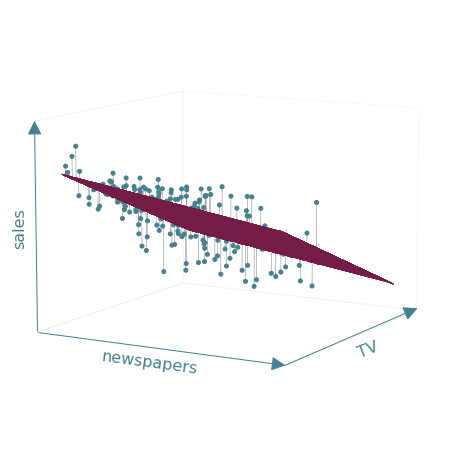

In [14]:
# MLR

beta0 = mlr.params[0]
beta1 = mlr.params[1]
beta2 = mlr.params[2]

Xm1, Xm2 = np.meshgrid(X1, X2)

rplane = beta1 * Xm1 + beta2 * Xm2 + beta0 # regression plane


# axis arrow param
hw = 1./30.* 40 
hl = 1./30.* 320
lw = 1. # axis line width

# surface patches colours
colors = np.empty((201,201), dtype='U50')
for j in range(len(Y)):
    for i in range(len(X1)):
        colors[i,j]='#741b47'

# start the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.view_init(10,30)


# Y axis - sales
ax.invert_zaxis()
ax.zaxis.pane.fill = False
ax.zaxis.set_rotate_label(False)
ax.axes.set_zlabel('sales', fontsize=16, c='#45818e',rotation=90, labelpad=-12)
ax.zaxis.set_ticks([])
ax.w_zaxis.line.set_color('none')
ax.arrow3D(-51, 0, -2.9, 0, 0, 31, mutation_scale=30, arrowstyle='<|-',
           fc='#45818e',ec='#45818e', lw=1) 


# X1 axis - TV
ax.invert_xaxis()
ax.xaxis.pane.fill = False
ax.xaxis.set_rotate_label(False)
ax.axes.set_xlabel('TV', fontsize=16, c='#45818e', rotation=21, labelpad=-9, loc='right')
ax.xaxis.set_ticks([])
ax.w_xaxis.line.set_color('none')
ax.arrow3D(454, 21, 45, 430, 0, -0.2, mutation_scale=30, arrowstyle='-|>',
           fc='#45818e',ec='#45818e', lw=1) 

# X2 axis - newspapers
ax.invert_yaxis()
ax.yaxis.pane.fill = False
ax.axes.set_ylabel('newspapers', fontsize=16, c='#45818e', labelpad=-9)
ax.yaxis.set_ticks([])
ax.w_yaxis.line.set_color('none')
ax.arrow3D(0, -14, 29.7, 540, 19.5, 18, mutation_scale=30, arrowstyle='-|>',
           fc='#45818e',ec='#45818e', lw=1) 


# Add plane
ax.plot_surface(Xm1, Xm2, rplane, edgecolors='#741b47', 
                facecolors=colors, shade=False)


# Add points
ax.scatter(X1, X2, Y, c=['#45818e'], s=16, alpha=1)


# Add residuals
for i in range(len(X)):
        lineX1data = (X1[i], X1[i]) # same X1
        lineX2data = (X2[i], X2[i]) # same X2
        lineYdata = (Y[i], rplane[i, i]) # different Y
        plt.plot(lineX1data, lineX2data, lineYdata, c='grey', lw=0.5)

#plt.show()

# save plot
# plt.savefig('MLR.png', dpi=300)